start: 2020/05/07 05:48:15


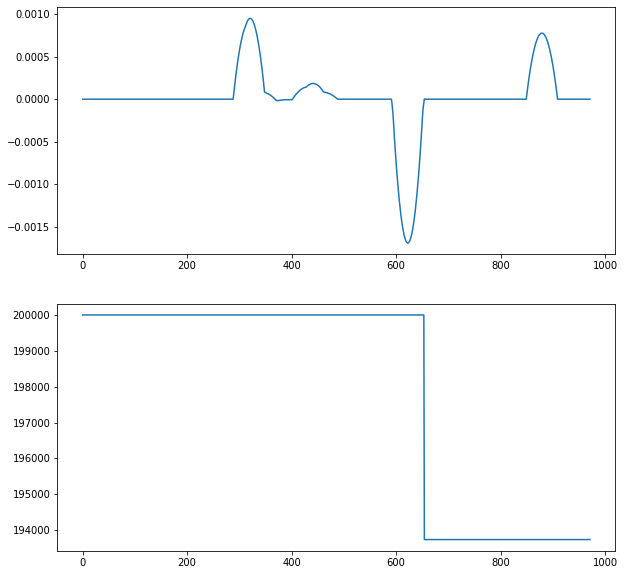

end: 2020/05/07 05:48:15


In [1]:
import pickle
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
from mylib import bitcoin
from mylib import simulator
%matplotlib inline

def plot(data, s, model):
    x = data # b.data_test
    y_result = list(data["result"])
    # y_pred = list(b.model.predict(x))  # TODO: Build in simulator.py
    y_asset = list(s.simulate(data, model))
    
    _, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    ax1.plot(list(range(len(x))), y_result)
    #ax2.plot(list(range(len(x))), y_pred)
    ax2.plot(list(range(len(x))), y_asset)
    plt.show()

def main():
    print("start: " + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))
    
    
    file_name = "train_test"
    csv = pd.read_csv("datasets/" + file_name + ".csv")

    with open("models/" + file_name + ".pickle", mode="rb") as file:
        model = pickle.load(file)

    test_start = int(len(csv) * 0.8)  # 最後20%のデータでテスト
    data = csv[test_start:]

    s = simulator.BitcoinSimulator(200000)

    plot(data, s, model)
    
    print("end: " + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))

if __name__ == "__main__":
    main()